## Hypotheses

H1: There is a negative relationship between ESG Risk and Expected Returns

H2: There is a positive relationship between ESG Risk and Total Risk

H3: Returns of firms with higher ESG Risk are statistically lower than the returns of firms with lower ESG Risk


In [1]:
import os
import sys
from tqdm.notebook import tqdm
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [2]:
tickers_lse = ['FOUR.L', '888.L', 'ASL.L', 'AAS.L', 'AAIF.L', 'ACIC.L', 'AEI.L', 'ANII.L', 'ABDN.L', 'AUSC.L', 'ADM.L',
 'ATST.L', 'AAL.L', 'AEP.L', 'ANTO.L', 'APTD.L', 'ATS.L', 'ASHM.L', 'AHT.L', 'DGN.L', 'ABF.L', 'AGR.L', 'AZN.L', 'ARR.L', 'AGT.L', 'AV.L', 'AVON.L', 'BA.L', 'BGCG.L', 'BGEU.L', 'BGFD.L',
 'BGS.L', 'BGUK.L', 'BCPT.L', 'BBY.L', 'BNKR.L', 'BARC.L', 'BAG.L', 'BDEV.L', 'BBGI.L', 'BEZ.L', 'BKG.L', 'BHMG.L', 'BYG.L', 'BLND.L', 'BVIC.L', 'BKY.L', 'BRBY.L', 'CCR.L', 'CLDN.L', 'CPI.L',
 'CAL.L', 'CAPD.L', 'CNE.L', 'CCL.L', 'CEY.L', 'CNA.L', 'CWR.L', 'CHG.L', 'CSN.L', 'CLIG.L', 'CTY.L', 'CKN.L', 'CBG.L', 'CLI.L', 'COA.L', 'CCC.L', 'CYN.L', 'CTPE.L', 'CTUK.L', 'CHI.L', 'CURY.L',
  'DLAR.L', 'DLN.L', 'DPLM.L', 'DSCV.L', 'DOM.L', 'DRX.L', 'DIG.L', 'DNLM.L', 'EDIN.L', 'EWI.L', 'ELM.L', 'ENQ.L', 'ENT.L', 'ESNT.L', 'EAT.L', 'EOT.L', 'FCIT.L', 'FXPO.L', 'FRAS.L', 'FRES.L',
  'FSTA.L', 'FUTR.L', 'GFRD.L', 'GAW.L', 'GCP.L', 'GNS.L', 'GOT.L', 'HSBA.L', 'HVPE.L', 'HL.L', 'HWG.L', 'HAS.L', 'HEAD.L', 'HLCL.L', 'HEFT.L', 'HNE.L', 'HFEL.L', 'HINT.L', 'HSL.L', 'HRI.L',
  'HGT.L', 'HICL.L', 'WYN.L', 'WKP.L', 'WTAN.L', 'XAR.L', 'XPP.L', 'ZTF.L', 'KCT.L', 'KGF.L', 'LRE.L', 'LAND.L', 'LWDB.L', 'LGEN.L', 'LTI.L', 'LSEG.L', 'LMP.L', 'LWI.L', 'LSL.L', 'MACF.L',
  'MAJE.L', 'EMG.L', 'MKS.L', 'MARS.L', 'MEGP.L', 'MER.L', 'MCT.L', 'MAB.L', 'MNDI.L', 'MNKS.L', 'MGAM.L', 'MGNS.L', 'PSON.L', 'PSN.L', 'PTEC.L', 'PRV.L', 'PRU.L', 'PZC.L', 'QQ.L', 'RNK.L',
  'RAT.L', 'RCH.L', 'RECI.L', 'RKT.L', 'REC.L', 'REDD.L', 'RDW.L', 'REL.L', 'RWI.L', 'RSW.L', 'RCDO.L', 'RMV.L', 'RIII.L', 'RIO.L', 'RCP.L', 'RWA.L', 'RR.L', 'ROR.L', 'RICA.L', 'SUS.L',
  'SAFE.L', 'SGE.L', 'SBRY.L', 'SVS.L', 'SCF.L', 'SJG.L', 'SOI.L', 'SREI.L', 'SCP.L', 'SDR.L', 'SAIN.L', 'SMT.L', 'SST.L', 'STB.L', 'SNR.L', 'SRP.L', 'SFR.L', 'SVT.L', 'SHC.L', 'SHI.L',
  'SRE.L', 'SN.L', 'SMDS.L', 'SMIN.L', 'SNWS.L', 'SKG.L', 'SXS.L', 'SDY.L', 'SPX.L', 'SSE.L', 'STJ.L', 'STAN.L', 'STEM.L', 'SEC.L', 'STS.L', 'STVG.L', 'SDRY.L', 'SYNT.L', 'TATE.L', 'TEP.L',
  'TMPL.L', 'TEM.L', 'ESCT.L', 'GSCT.L', 'TPT.L', 'TCAP.L', 'TRY.L', 'TPK.L', 'TET.L', 'TRI.L', 'TIGT.L', 'TTG.L', 'TLW.L', 'TYMN.L', 'UKCM.L', 'ULVR.L', 'UTG.L', 'UU.L', 'SHED.L', 'UEM.L',
  'VIP.L', 'VSVS.L', 'VCT.L', 'VID.L', 'VTY.L', 'VOD.L', 'JDW.L', 'SMWH.L', 'WIN.L', 'WG.L', 'WWH.L']


In [3]:
df = pd.DataFrame()

In [4]:
# Redirect both stdout and stderr to os.devnull to hide yfinance output
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

# Downloading returns data from Yahoo Finance
for ticker in tqdm(tickers_lse, desc='Downloading data from Yahoo Finance'):
    stock_data = yf.download(ticker, start="2012-01-01", end="2022-01-01")["Adj Close"]
    df[ticker] = stock_data

# Restore stdout and stderr
sys.stdout = sys.__stdout__
sys.stderr = sys.__stderr__

In [5]:
df

,FOUR.L,888.L,ASL.L,AAS.L,AAIF.L,ACIC.L,AEI.L,ANII.L,ABDN.L,AUSC.L,...,VSVS.L,VCT.L,VID.L,VTY.L,VOD.L,JDW.L,SMWH.L,WIN.L,WG.L,WWH.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,163.400879,28.884571,404.389404,109.088753,100.455658,352.997040,147.705002,196.547134,136.073410,161.444763,...,157.033875,772.076355,376.025909,256.611755,76.911720,381.963379,402.170135,49.412086,503.986908,64.662956
2012-01-04,161.948441,28.716637,403.604187,108.050247,101.046562,348.195160,147.773972,196.796555,135.609894,161.461182,...,155.422485,768.657104,378.235870,252.511139,76.592567,377.159973,398.169281,51.096592,503.602386,64.882919
2012-01-05,160.859100,28.212841,399.678131,107.463257,101.194298,347.021271,145.152390,197.544830,133.689636,160.367950,...,156.008408,759.083435,376.705994,242.764923,75.443680,372.178528,403.939758,49.224922,512.059937,63.959152
2012-01-06,158.589645,28.212841,403.211639,107.824478,101.785217,348.195160,147.222061,196.796555,133.027496,162.291367,...,157.033875,774.128113,375.345947,242.467743,76.379822,374.847137,405.478638,49.786427,515.519775,64.487007
2012-01-09,156.864868,28.380777,406.745148,107.824478,102.228355,346.594482,146.532227,198.043686,131.703186,162.603699,...,157.326828,765.921753,371.946106,255.423126,75.358589,374.847137,404.709229,50.160759,519.363953,64.574982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,2669.142578,304.000000,1373.892456,279.997772,206.092407,720.086487,317.534424,614.000000,205.898239,717.990479,...,396.612000,2171.945557,1337.044800,1047.092896,91.946159,918.000000,1432.213501,317.014160,186.699997,354.488983
2021-12-24,2650.378662,305.000000,1379.640991,278.112213,209.270035,724.064819,319.281555,612.000000,206.495544,712.261780,...,389.148865,2150.244141,1351.168457,1044.876343,91.701714,929.500000,1427.834961,320.689667,189.800003,354.979980
2021-12-29,2692.597168,300.000000,1389.221924,279.054993,210.631882,726.054016,313.603485,618.000000,206.154236,725.628601,...,397.145081,2197.263672,1398.247559,1064.381836,91.783188,933.000000,1446.321533,328.040741,188.000000,349.088196


In [6]:
#Calculating daily return
df_returns = df.pct_change(1, fill_method=None)
df_returns.dropna(inplace=True)

df_returns

,FOUR.L,888.L,ASL.L,AAS.L,AAIF.L,ACIC.L,AEI.L,ANII.L,ABDN.L,AUSC.L,...,VSVS.L,VCT.L,VID.L,VTY.L,VOD.L,JDW.L,SMWH.L,WIN.L,WG.L,WWH.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.008889,-0.005814,-0.001942,-0.009520,0.005882,-0.013603,0.000467,0.001269,-0.003406,0.000102,...,-0.010261,-0.004429,0.005877,-0.015980,-0.004150,-0.012576,-0.009948,0.034091,-0.000763,0.003402
2012-01-05,-0.006726,-0.017544,-0.009727,-0.005433,0.001462,-0.003371,-0.017740,0.003802,-0.014160,-0.006771,...,0.003770,-0.012455,-0.004045,-0.038597,-0.015000,-0.013208,0.014493,-0.036630,0.016794,-0.014237
2012-01-06,-0.014108,0.000000,0.008841,0.003361,0.005839,0.003383,0.014259,-0.003788,-0.004953,0.011994,...,0.006573,0.019820,-0.003610,-0.001224,0.012408,0.007170,0.003810,0.011407,0.006757,0.008253
2012-01-09,-0.010876,0.005952,0.008763,0.000000,0.004354,-0.004597,-0.004686,0.006337,-0.009955,0.001925,...,0.001866,-0.010601,-0.009058,0.053431,-0.013370,0.000000,-0.001898,0.007519,0.007457,0.001364
2012-01-10,-0.013889,0.053254,0.016409,0.004606,0.000000,0.016009,0.013183,0.034005,0.024133,0.003690,...,0.024209,0.042857,0.008227,0.010005,0.009317,0.003322,-0.002852,0.011194,0.019985,0.005109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.014260,0.013333,0.005610,0.001687,-0.004386,0.005556,0.019921,0.013201,0.017714,0.023129,...,0.018713,0.010943,0.014286,0.001272,0.002666,0.026272,0.026142,-0.011461,-0.010074,0.004173
2021-12-24,-0.007030,0.003289,0.004184,-0.006734,0.015418,0.005525,0.005502,-0.003257,0.002901,-0.007979,...,-0.018817,-0.009992,0.010563,-0.002117,-0.002659,0.012527,-0.003057,0.011594,0.016604,0.001385
2021-12-29,0.015929,-0.016393,0.006945,0.003390,0.006508,0.002747,-0.017784,0.009804,-0.001653,0.018767,...,0.020548,0.021867,0.034843,0.018668,0.000888,0.003765,0.012947,0.022923,-0.009484,-0.016598


In [7]:
# The highest daily return in our DataFrame
df_returns.max().max()

2.4864853094046784

In [8]:
# The lowest daily return in our DataFrame
df_returns.min().min()

-0.7701149991658566

In [9]:
df_described = df_returns.describe().T
df_described

,count,mean,std,min,25%,50%,75%,max
FOUR.L,2527.0,0.001372,0.023247,-0.210300,-0.009677,0.000000,0.010511,0.186321
888.L,2527.0,0.001210,0.024045,-0.153915,-0.010596,0.000000,0.011111,0.317365
ASL.L,2527.0,0.000585,0.013559,-0.138775,-0.005305,0.000502,0.006680,0.116208
AAS.L,2527.0,0.000443,0.011543,-0.077636,-0.004914,0.000000,0.006791,0.070050
AAIF.L,2527.0,0.000352,0.010997,-0.086705,-0.004926,0.000000,0.006486,0.080702
...,...,...,...,...,...,...,...,...
JDW.L,2527.0,0.000593,0.021344,-0.229099,-0.008293,0.000649,0.009262,0.251117
SMWH.L,2527.0,0.000767,0.023187,-0.210460,-0.008340,0.000724,0.009334,0.349036
WIN.L,2527.0,0.001053,0.024301,-0.168122,-0.011073,0.000000,0.012048,0.236559
WG.L,2527.0,-0.000042,0.026096,-0.217263,-0.012234,0.000000,0.012446,0.153820


In [10]:
# We only need the mean and std from df_described
df_described = df_described[['mean', 'std']]
df_described.reset_index(inplace=True)
df_described.head()

,index,mean,std
0,FOUR.L,0.001372,0.023247
1,888.L,0.001210,0.024045
2,ASL.L,0.000585,0.013559
3,AAS.L,0.000443,0.011543
4,AAIF.L,0.000352,0.010997


In [11]:
# Renaming columns
df_described.columns = ['Ticker', 'Expected Daily Return', 'Total Risk']
df_described.head()

,Ticker,Expected Daily Return,Total Risk
0,FOUR.L,0.001372,0.023247
1,888.L,0.001210,0.024045
2,ASL.L,0.000585,0.013559
3,AAS.L,0.000443,0.011543
4,AAIF.L,0.000352,0.010997


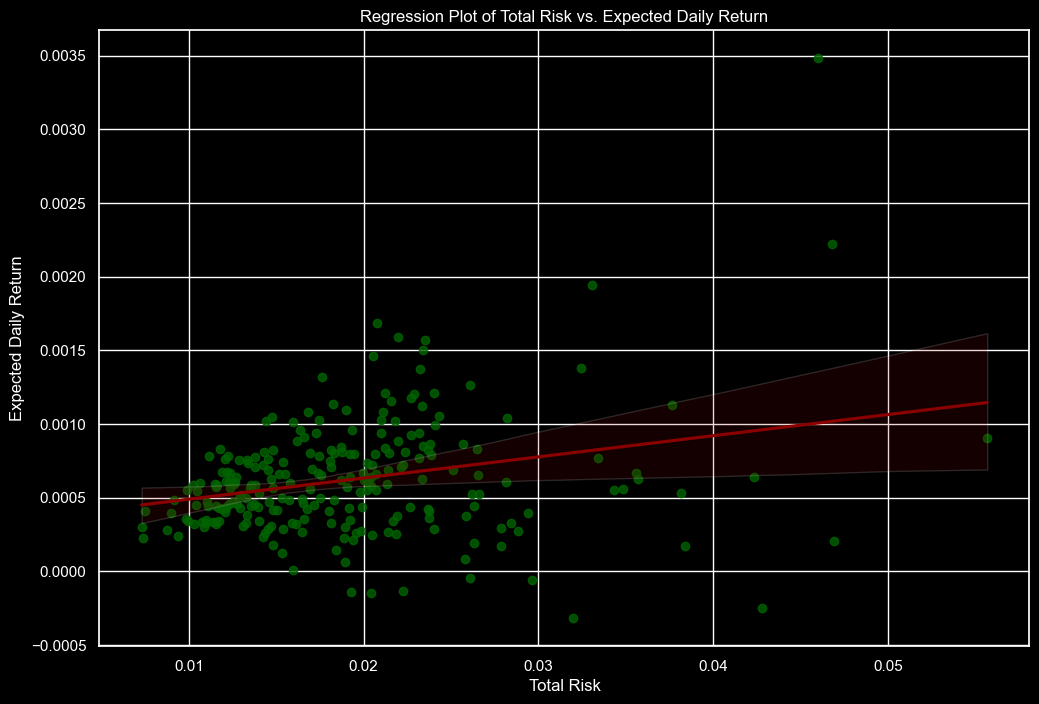

In [12]:
# Plotting a Regression Plot of Total Risk vs. Expected Daily Return
plt.figure(figsize=(12, 8), facecolor='black')
plt.style.use('dark_background')
sns.regplot(x=df_described['Total Risk'], y=df_described['Expected Daily Return'], color='darkred', scatter_kws={'color': 'darkgreen'})
plt.xlabel('Total Risk')
plt.ylabel('Expected Daily Return')
plt.title('Regression Plot of Total Risk vs. Expected Daily Return')
plt.show()

In [13]:
# Retrieving our ESG dataset
df_esg = pd.read_csv('ESGDATA.csv')

# Removing the null values
df_esg.dropna(inplace=True)

df_esg

,Ticker,Link,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Data Date
4,AAIF.L,https://uk.finance.yahoo.com/quote/AAIF.L/sust...,24.0,5.4,8.1,8.3,12-2020
7,ANII.L,https://uk.finance.yahoo.com/quote/ANII.L/sust...,25.0,4.2,7.1,7.2,12-2020
8,ABDN.L,https://uk.finance.yahoo.com/quote/ABDN.L/sust...,17.0,1.4,8.5,6.7,09-2023
10,ATST.L,https://uk.finance.yahoo.com/quote/ATST.L/sust...,23.0,3.8,10.4,7.9,12-2020
11,AAL.L,https://uk.finance.yahoo.com/quote/AAL.L/susta...,23.0,10.4,8.9,3.8,9-2023
...,...,...,...,...,...,...,...
220,TIGT.L,https://uk.finance.yahoo.com/quote/TIGT.L/sust...,21.0,3.8,9.2,7.3,12-2020
225,ULVR.L,https://uk.finance.yahoo.com/quote/ULVR.L/sust...,25.0,7.2,10.3,7.1,9-2023
227,UU.L,https://uk.finance.yahoo.com/quote/UU.L/sustai...,12.0,3.9,2.7,4.9,9-2023
235,VOD.L,https://uk.finance.yahoo.com/quote/VOD.L/susta...,15.0,2.6,7.6,5.1,9-2023


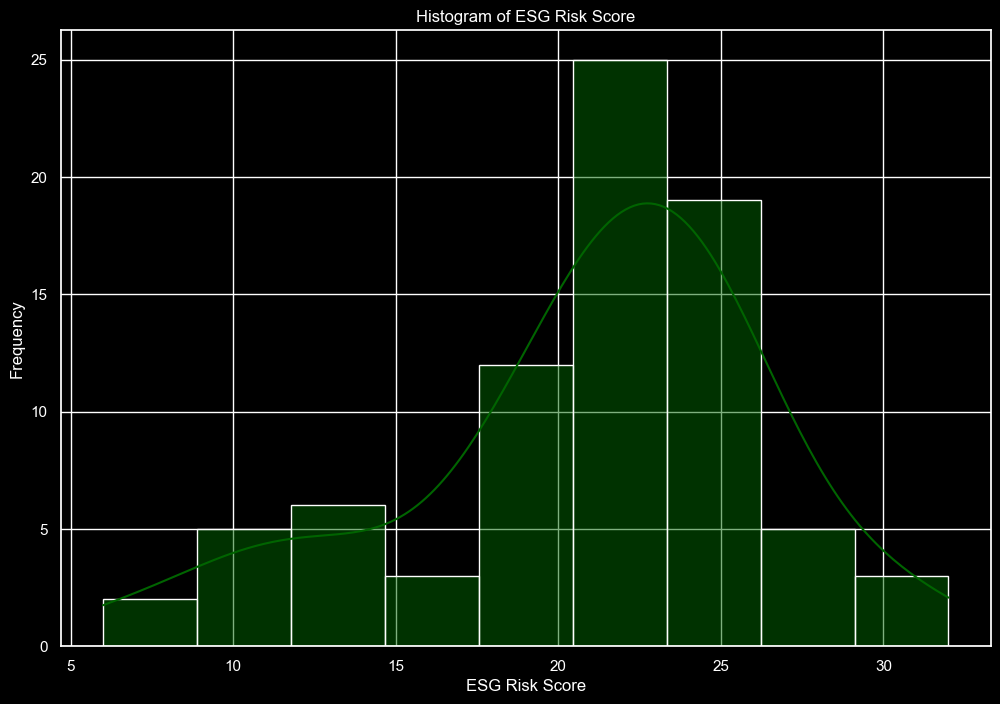

In [14]:
# Plotting a Histogram of our ESG Risk Scores to see their distribution
plt.show()
plt.figure(figsize=(12, 8))
sns.histplot(data=df_esg, x='ESG Risk Score', color='darkgreen', kde=True)
plt.xlabel('ESG Risk Score')
plt.ylabel('Frequency')
plt.title('Histogram of ESG Risk Score')
plt.show()

In [15]:
# Merging df_esg and df_described into one master DataFrame
df_master = df_described.merge(df_esg, left_on='Ticker', right_on='Ticker')

# We no longer need the yfinance link or data date
df_master.drop(columns=['Link', 'Data Date'], inplace=True)

# Removing null values
df_master.dropna(inplace=True)

df_master

,Ticker,Expected Daily Return,Total Risk,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score
0,AAIF.L,0.000352,0.010997,24.0,5.4,8.1,8.3
1,ANII.L,0.000565,0.014800,25.0,4.2,7.1,7.2
2,ABDN.L,0.000350,0.019218,17.0,1.4,8.5,6.7
3,ATST.L,0.000554,0.009883,23.0,3.8,10.4,7.9
4,AAL.L,0.000608,0.028129,23.0,10.4,8.9,3.8
...,...,...,...,...,...,...,...
75,TIGT.L,0.000354,0.009831,21.0,3.8,9.2,7.3
76,ULVR.L,0.000438,0.012153,25.0,7.2,10.3,7.1
77,UU.L,0.000496,0.013266,12.0,3.9,2.7,4.9
78,VOD.L,0.000178,0.014823,15.0,2.6,7.6,5.1


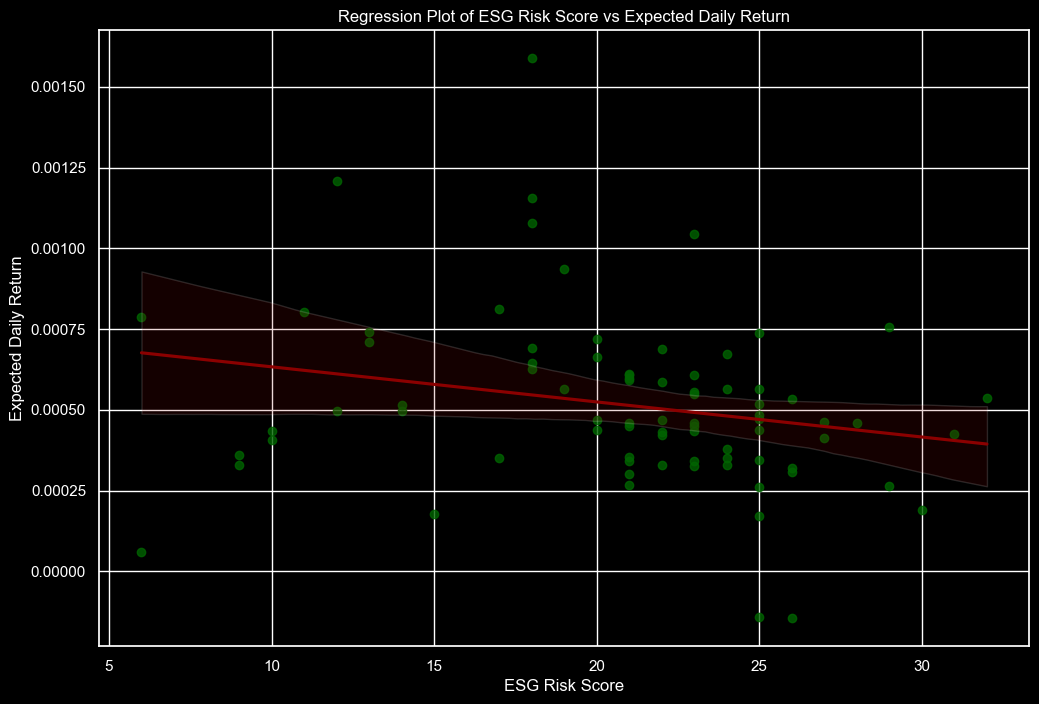

In [16]:
# Plotting a Regression Plot of ESG Risk Score vs. Expected Daily Return
plt.figure(figsize=(12, 8))
sns.regplot(x=df_master['ESG Risk Score'], y=df_master['Expected Daily Return'], color='darkred', scatter_kws={'color': 'darkgreen'})
plt.xlabel('ESG Risk Score')
plt.ylabel('Expected Daily Return')
plt.title('Regression Plot of ESG Risk Score vs Expected Daily Return')
plt.show()

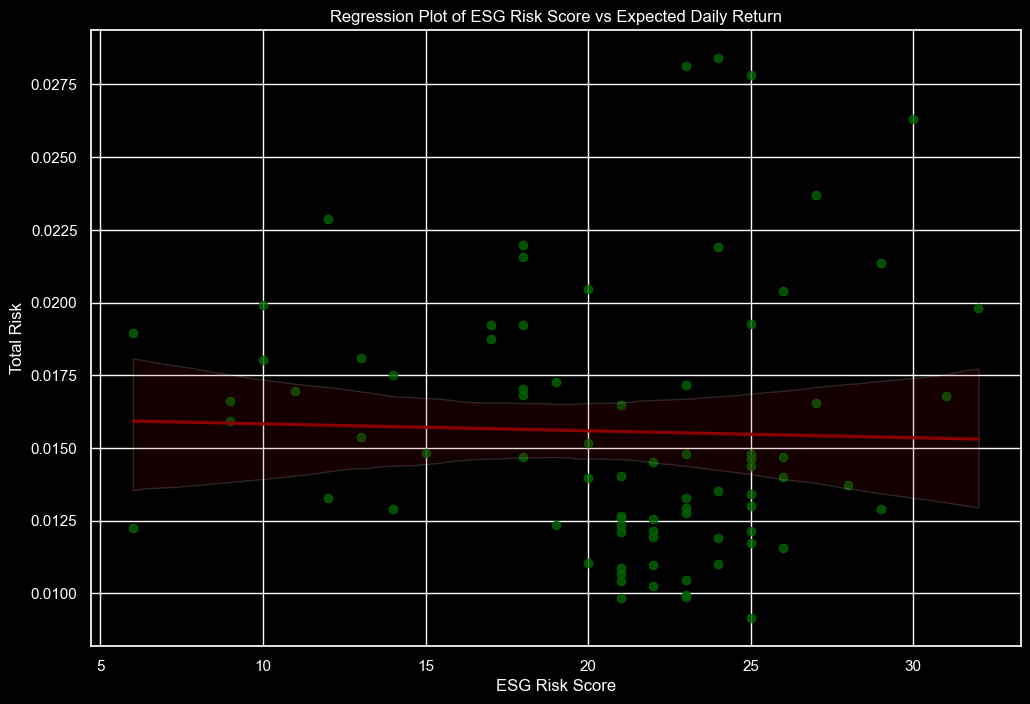

In [17]:
# Plotting a Regression Plot of ESG Risk Score vs. Total Risk
plt.figure(figsize=(12, 8))
sns.regplot(x=df_master['ESG Risk Score'], y=df_master['Total Risk'], color='darkred', scatter_kws={'color': 'darkgreen'})
plt.xlabel('ESG Risk Score')
plt.ylabel('Total Risk')
plt.title('Regression Plot of ESG Risk Score vs Expected Daily Return')
plt.show()

In [18]:
# Plotting a correlation matrix to 3 d.p.
df_master.select_dtypes(include=np.number).corr().round(3)

,Expected Daily Return,Total Risk,ESG Risk Score,Environment Risk Score,Social Risk Score
Expected Daily Return,1.000,0.041,-0.228,-0.145,-0.328
Total Risk,0.041,1.000,-0.030,0.311,0.026
ESG Risk Score,-0.228,-0.030,1.000,0.494,0.837
Environment Risk Score,-0.145,0.311,0.494,1.000,0.225
Social Risk Score,-0.328,0.026,0.837,0.225,1.000


$$ t \text{ statistic} (t) = \frac{r \sqrt{n-2}}{\sqrt{1 - r^2}} $$



In [19]:
# the t-statistic function
def t_statistic(x, y, data):
    r = np.corrcoef(data[x], data[y])[0][1]
    n = len(data)
    t = (r * np.sqrt(n - 2)) / np.sqrt(1 - (r ** 2))

    return t  

In [20]:
#H1
t_statistic('ESG Risk Score', 'Expected Daily Return', df_master)

-2.068145916526444

Based on the calculated t-statistic of -2.068, we can see that there is some negative correlation between the Expected Daily Return and the ESG Risk Score. However this value is less negative than our critical value of -3, indicating that the correlation is not statistically significant. Therefore we fail to reject the null hypothesis in favour of the alternative hypothesis.

In [21]:
#H2
t_statistic('ESG Risk Score', 'Total Risk', df_master)

-0.2647528238644526

Based on the calculated t-statistic of -0.265, we can see that there is a small negative correlation between the Total Risk and the ESG Risk Score. However this value is less negative than our critical value of -3, indicating that the correlation is not statistically significant. Therefore we fail to reject the null hypothesis in favour of the alternative hypothesis.

Despite this not being related to any of the hypotheses, I decided to investigate the correlation between Expected Daily Return and Social Risk Score:

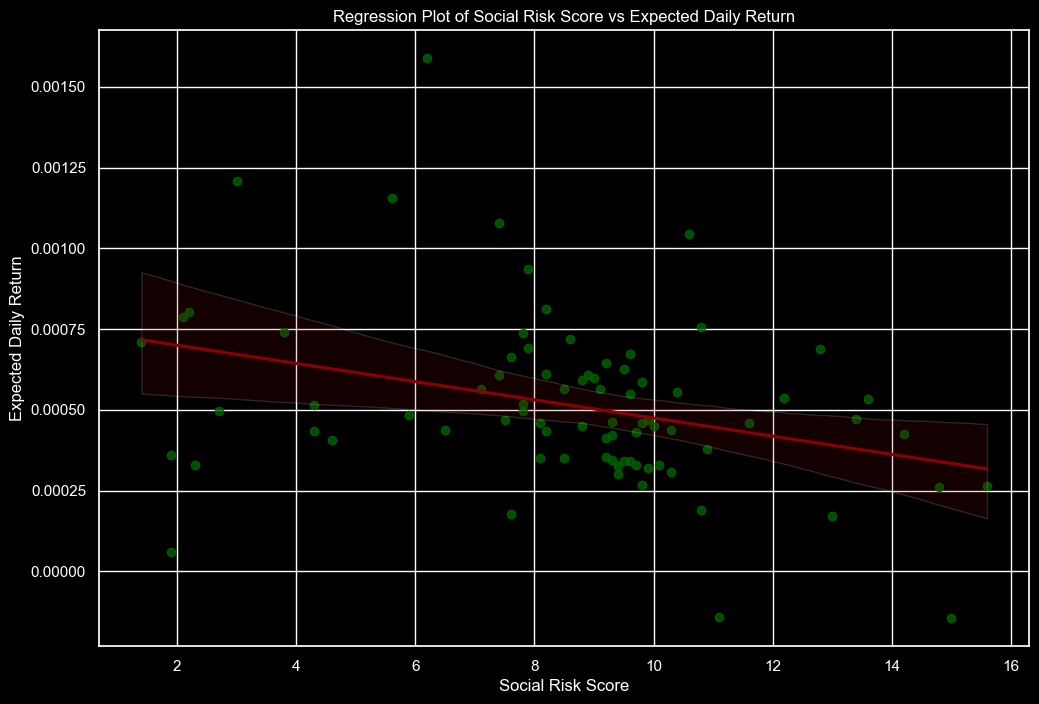

In [22]:
# Plotting a Regression Plot of ESG Risk Score vs. Total Risk
plt.figure(figsize=(12, 8))
sns.regplot(x=df_master['Social Risk Score'], y=df_master['Expected Daily Return'], color='darkred', scatter_kws={'color': 'darkgreen'})
plt.xlabel('Social Risk Score')
plt.ylabel('Expected Daily Return')
plt.title('Regression Plot of Social Risk Score vs Expected Daily Return')
plt.show()

In [23]:
t_statistic('Social Risk Score', 'Expected Daily Return', df_master)

-3.063476706700141

Based on the calcuated t-statistic of -3.063, which is more negative than our critical value of -3, we can say that the negative correlation between Social Risk Score and Expected Daily Return is statistically significant.

To evaluate H3, I will divide our list of securities into quartiles, and analyse each quartile's performance over the years.

In [24]:
quartiles = ['Q1', 'Q2', 'Q3', 'Q4']

In [25]:
# Dividing the list of tickers into quartiles by ESG Risk Score
df_esg['Quartile'] = df_esg['ESG Risk Score'].transform(
    lambda x: pd.qcut(x, 4, labels=quartiles))

df_esg

,Ticker,Link,ESG Risk Score,Environment Risk Score,Social Risk Score,Governance Risk Score,Data Date,Quartile
4,AAIF.L,https://uk.finance.yahoo.com/quote/AAIF.L/sust...,24.0,5.4,8.1,8.3,12-2020,Q3
7,ANII.L,https://uk.finance.yahoo.com/quote/ANII.L/sust...,25.0,4.2,7.1,7.2,12-2020,Q3
8,ABDN.L,https://uk.finance.yahoo.com/quote/ABDN.L/sust...,17.0,1.4,8.5,6.7,09-2023,Q1
10,ATST.L,https://uk.finance.yahoo.com/quote/ATST.L/sust...,23.0,3.8,10.4,7.9,12-2020,Q3
11,AAL.L,https://uk.finance.yahoo.com/quote/AAL.L/susta...,23.0,10.4,8.9,3.8,9-2023,Q3
...,...,...,...,...,...,...,...,...
220,TIGT.L,https://uk.finance.yahoo.com/quote/TIGT.L/sust...,21.0,3.8,9.2,7.3,12-2020,Q2
225,ULVR.L,https://uk.finance.yahoo.com/quote/ULVR.L/sust...,25.0,7.2,10.3,7.1,9-2023,Q3
227,UU.L,https://uk.finance.yahoo.com/quote/UU.L/sustai...,12.0,3.9,2.7,4.9,9-2023,Q1
235,VOD.L,https://uk.finance.yahoo.com/quote/VOD.L/susta...,15.0,2.6,7.6,5.1,9-2023,Q1


In [26]:
df_returns.head()

,FOUR.L,888.L,ASL.L,AAS.L,AAIF.L,ACIC.L,AEI.L,ANII.L,ABDN.L,AUSC.L,...,VSVS.L,VCT.L,VID.L,VTY.L,VOD.L,JDW.L,SMWH.L,WIN.L,WG.L,WWH.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,-0.008889,-0.005814,-0.001942,-0.009520,0.005882,-0.013603,0.000467,0.001269,-0.003406,0.000102,...,-0.010261,-0.004429,0.005877,-0.015980,-0.004150,-0.012576,-0.009948,0.034091,-0.000763,0.003402
2012-01-05,-0.006726,-0.017544,-0.009727,-0.005433,0.001462,-0.003371,-0.017740,0.003802,-0.014160,-0.006771,...,0.003770,-0.012455,-0.004045,-0.038597,-0.015000,-0.013208,0.014493,-0.036630,0.016794,-0.014237
2012-01-06,-0.014108,0.000000,0.008841,0.003361,0.005839,0.003383,0.014259,-0.003788,-0.004953,0.011994,...,0.006573,0.019820,-0.003610,-0.001224,0.012408,0.007170,0.003810,0.011407,0.006757,0.008253
2012-01-09,-0.010876,0.005952,0.008763,0.000000,0.004354,-0.004597,-0.004686,0.006337,-0.009955,0.001925,...,0.001866,-0.010601,-0.009058,0.053431,-0.013370,0.000000,-0.001898,0.007519,0.007457,0.001364
2012-01-10,-0.013889,0.053254,0.016409,0.004606,0.000000,0.016009,0.013183,0.034005,0.024133,0.003690,...,0.024209,0.042857,0.008227,0.010005,0.009317,0.003322,-0.002852,0.011194,0.019985,0.005109


In [27]:
# Unstacking df_returns dataFrame so the tickers are no longer column headers, allowing us to merge the dataFrame with df_esg
df_returns = df_returns.unstack().reset_index()
df_returns.columns = ['Ticker', 'Date', 'Returns']
df_returns

,Ticker,Date,Returns
0,FOUR.L,2012-01-04,-0.008889
1,FOUR.L,2012-01-05,-0.006726
2,FOUR.L,2012-01-06,-0.014108
3,FOUR.L,2012-01-09,-0.010876
4,FOUR.L,2012-01-10,-0.013889
...,...,...,...
614056,WWH.L,2021-12-23,0.004173
614057,WWH.L,2021-12-24,0.001385
614058,WWH.L,2021-12-29,-0.016598
614059,WWH.L,2021-12-30,0.015471


In [28]:
# Merging df_returns and df_esg
df_returns = df_returns.merge(df_esg, left_on='Ticker', right_on='Ticker')
df_returns = df_returns[['Ticker', 'Date', 'Returns', 'Quartile']]
df_returns

,Ticker,Date,Returns,Quartile
0,AAIF.L,2012-01-04,0.005882,Q3
1,AAIF.L,2012-01-05,0.001462,Q3
2,AAIF.L,2012-01-06,0.005839,Q3
3,AAIF.L,2012-01-09,0.004354,Q3
4,AAIF.L,2012-01-10,0.000000,Q3
...,...,...,...,...
202155,WWH.L,2021-12-23,0.004173,Q4
202156,WWH.L,2021-12-24,0.001385,Q4
202157,WWH.L,2021-12-29,-0.016598,Q4
202158,WWH.L,2021-12-30,0.015471,Q4


In [29]:
# Aggregating the data by date and quartile creating four seperate portfolios with a time series
quartile_returns = df_returns.groupby(['Date', 'Quartile'])['Returns'].mean().unstack()

# Dropping rows with null values
quartile_returns.dropna(inplace=True)

quartile_returns

Quartile,Q1,Q2,Q3,Q4
Date,,,,
2012-01-04,-0.010795,-0.004511,-0.006183,-0.010349
2012-01-05,-0.011026,-0.010477,-0.005080,0.000368
2012-01-06,0.006198,0.003549,0.002015,0.005235
2012-01-09,0.001111,-0.002271,-0.003624,-0.004275
2012-01-10,0.016479,0.012459,0.015569,0.026030
...,...,...,...,...
2021-12-23,0.007105,0.005987,0.007613,0.005166
2021-12-24,0.001950,0.002334,0.003502,-0.002607
2021-12-29,0.008714,0.006079,0.001088,0.002654


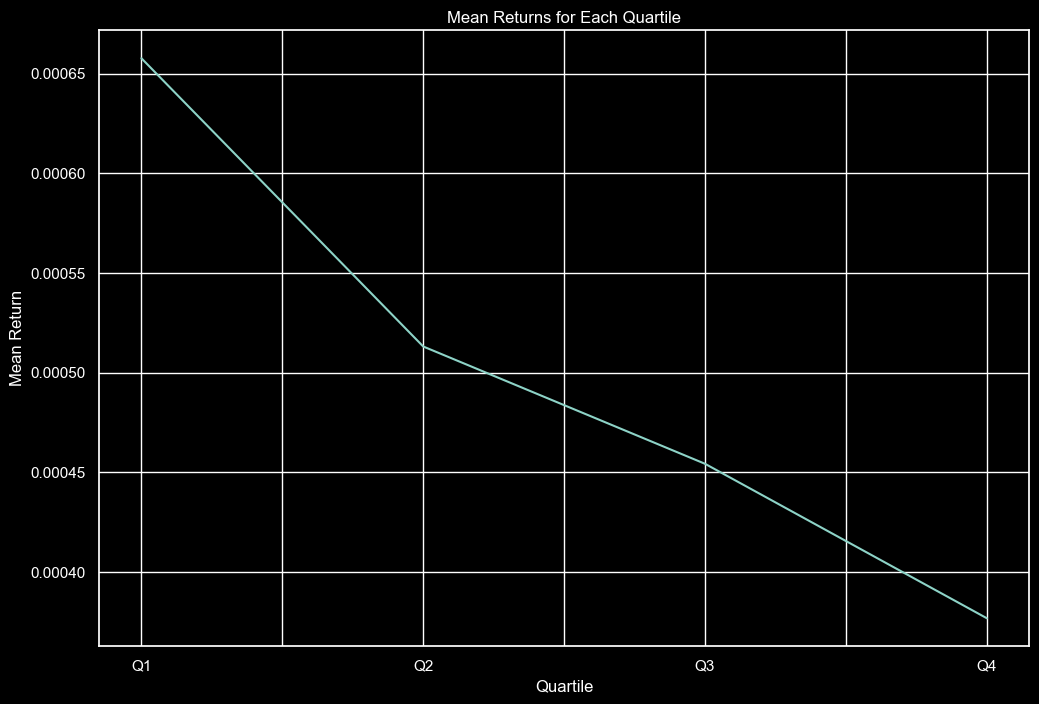

In [30]:
# Plotting a line plot to compare the mean return of each quartile
plt.figure(figsize=(12,8))
quartile_returns.mean().plot()
plt.title('Mean Returns for Each Quartile')
plt.xlabel('Quartile')
plt.ylabel('Mean Return')
plt.show()

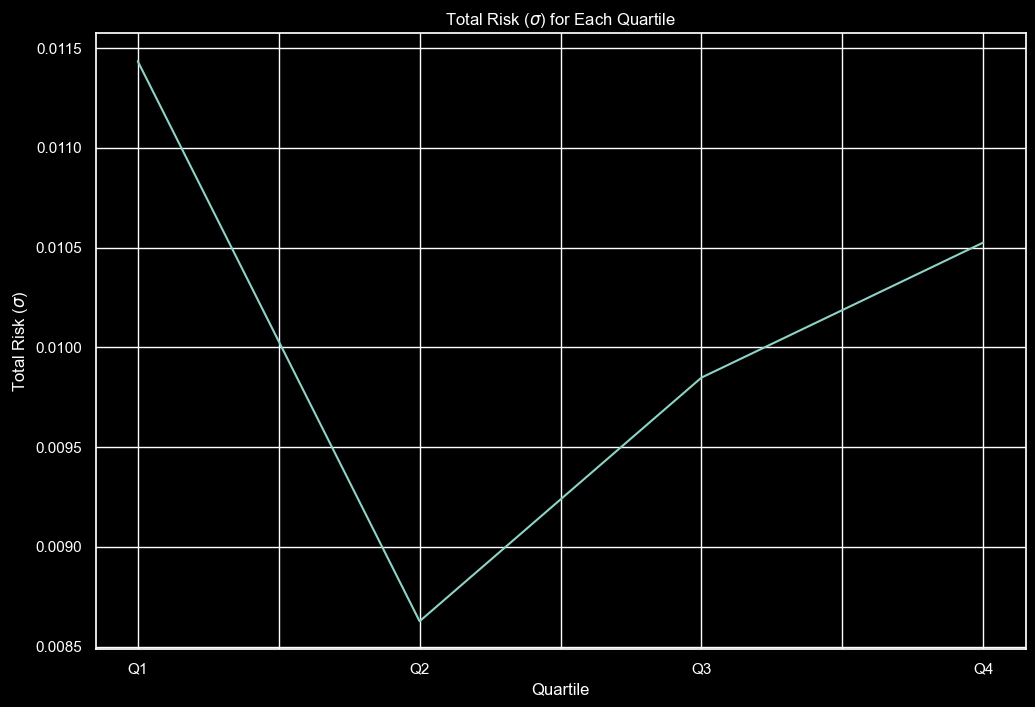

In [31]:
# Plotting a line plot to compare the total risk of each quartile
plt.figure(figsize=(12,8))
quartile_returns.std().plot()
plt.title('Total Risk ($\sigma$) for Each Quartile')
plt.xlabel('Quartile')
plt.ylabel('Total Risk ($\sigma$)')
plt.show()

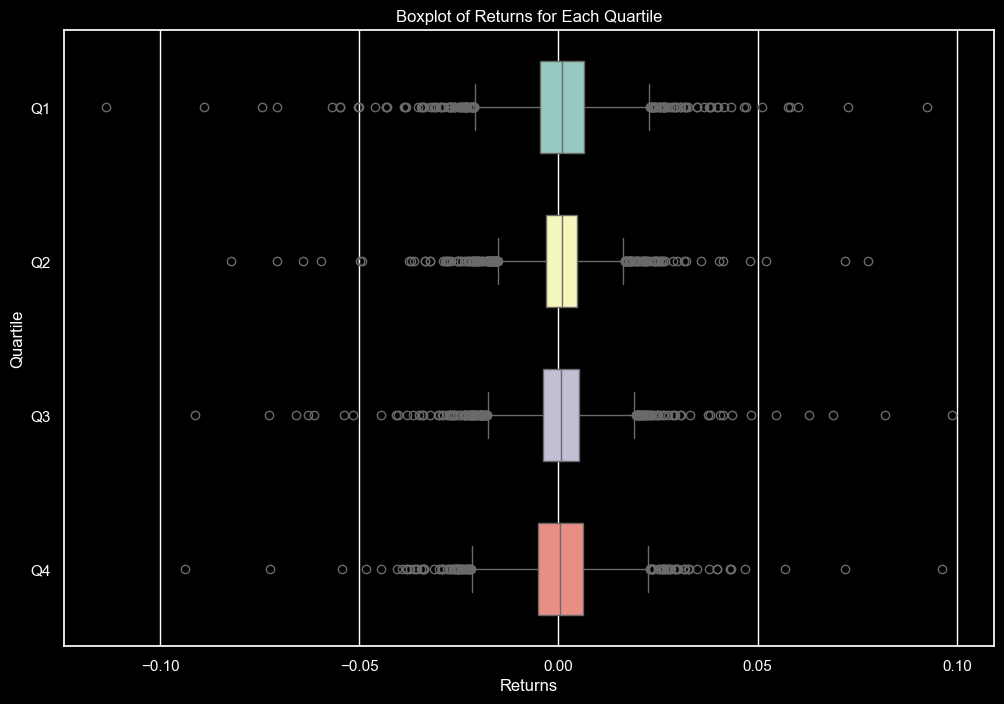

In [32]:
# Plotting a boxplot to see the spread of returns for each quartile
plt.figure(figsize=(12, 8))
sns.boxplot(data=quartile_returns, orient='h', width=0.6)
plt.title('Boxplot of Returns for Each Quartile')
plt.xlabel('Returns')
plt.ylabel('Quartile')
plt.show()

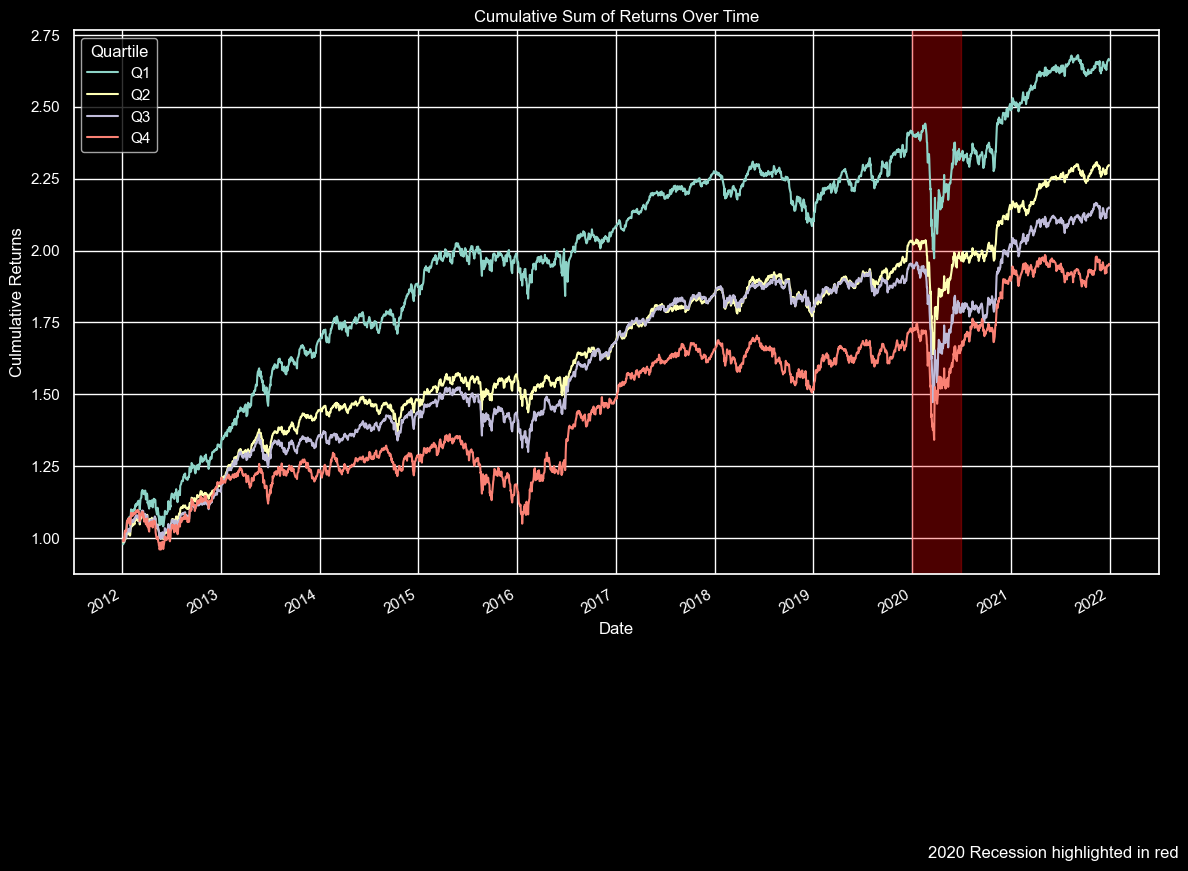

In [33]:
# Plotting a line plot to see the culmulative returns of each quartile between 2012 and 2022
(1 + quartile_returns.cumsum()).plot(figsize=(14,8))

# COVID-19 2020 Recession highlighted in red
plt.axvspan('2020-01-01', '2020-06-30', color='red', alpha=0.3)
plt.text('2020-03-01', quartile_returns['Q1'].min(), '2020 Recession highlighted in red', fontsize=12)

plt.ylabel('Culmulative Returns')
plt.title('Cumulative Sum of Returns Over Time')
plt.show()

$$ t-statistic = \frac{r_{Q1} - r_{Q4}}{\sqrt{\sigma_{Q1}^2 + \sigma_{Q4}^2} / \sqrt{n}} $$


In [34]:
#H3
stats.ttest_rel(quartile_returns['Q1'], quartile_returns['Q4'])

TtestResult(statistic=1.9493301126087828, pvalue=0.051366547173368964, df=2526)

From the above line plot, we can see that the quartile with the lowest ESG Risk Scores performed the best, whereas the quartile with the highest ESG Scores performed the worst. However, based on the t statistic of 1.949 falling short of our critical value of 3, and a p-value of 0.051 exceeding our significance level of 0.05, we fail to reject the null hypothesis in favour of the alternate hypothesis. Therefore, the differences in performance between the quartiles are not statistically significant. Despite this result, the observed results aren't completely insignificant as the null hypothesis would be rejected at the 10% significance level.